In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency, chi2, ttest_ind, f_oneway, chisquare, stats
from scipy.stats import probplot

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [34]:
df = pd.read_csv('kbo_21_24_merged.csv', encoding='cp949')
df.head(3)

,연도,순위,선수명,팀명,AVG,G,PA,AB,R,H,...,경기수,팀승수,팀패수,팀무승부수,팀승률,팀게임차,포지션,투구유형,타격유형,출생연도
0,2021,1,이정후,키움,0.360,123,544,464,78,167,...,144,70,67,7,0.511,7.0,외야수,우투,좌타,1998
1,2021,2,전준우,롯데,0.348,144,619,552,88,192,...,144,65,71,8,0.478,11.5,외야수,우투,우타,1986
2,2021,3,강백호,KT,0.347,142,627,516,76,179,...,144,76,59,9,0.563,0.0,내야수,우투,좌타,1999


In [35]:
df.columns

Index(['연도', '순위', '선수명', '팀명', 'AVG', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B',
       'HR', 'TB', 'RBI', 'SAC', 'SF', 'BB', 'IBB', 'HBP', 'SO', 'GDP', 'SLG',
       'OBP', 'OPS', 'MH', 'RISP', 'PH-BA', 'XBH', 'GO', 'AO', 'GO/AO',
       'GW RBI', 'BB/K', 'P/PA', 'ISOP', 'XR', 'GPA', '팀순위', '경기수', '팀승수',
       '팀패수', '팀무승부수', '팀승률', '팀게임차', '포지션', '투구유형', '타격유형', '출생연도'],
      dtype='object')

### [1] 적합성 검정: 데이터 분포와 기대 분포 일치 여부

#### 1.1 팀별 규정타석 충족 타자 수의 분포가 고른가?


[적합성 검정] 2021년 - 팀별 규정 타석 충족자 수
카이제곱 통계량 = 1.93, p-value = 0.9926
=> 균등 분포로 볼 수 있음


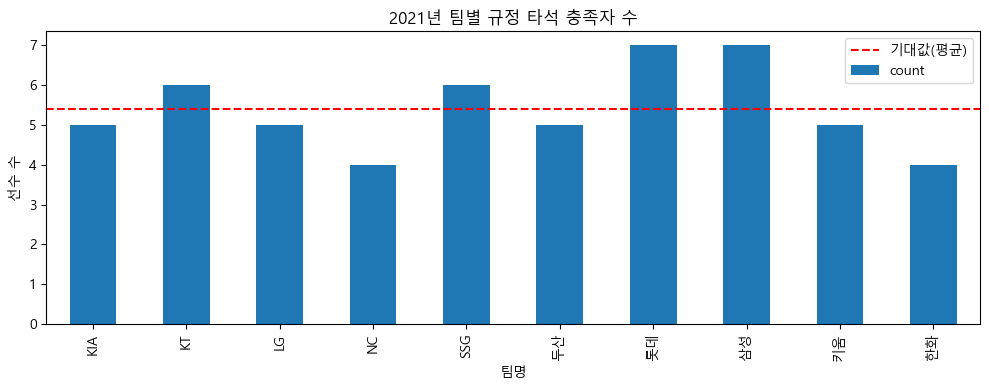


[적합성 검정] 2022년 - 팀별 규정 타석 충족자 수
카이제곱 통계량 = 4.55, p-value = 0.8719
=> 균등 분포로 볼 수 있음


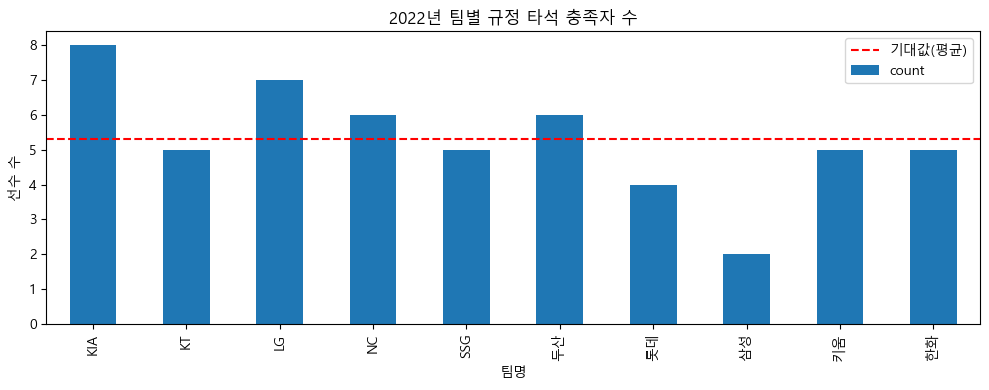


[적합성 검정] 2023년 - 팀별 규정 타석 충족자 수
카이제곱 통계량 = 7.60, p-value = 0.5749
=> 균등 분포로 볼 수 있음


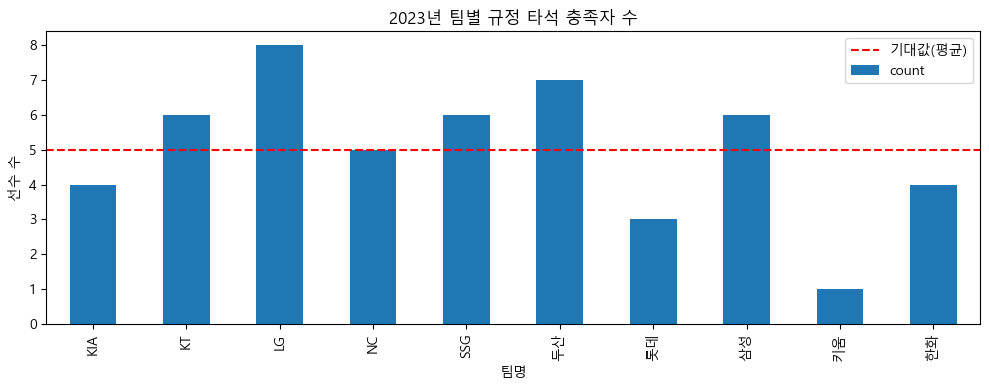


[적합성 검정] 2024년 - 팀별 규정 타석 충족자 수
카이제곱 통계량 = 1.50, p-value = 0.9971
=> 균등 분포로 볼 수 있음


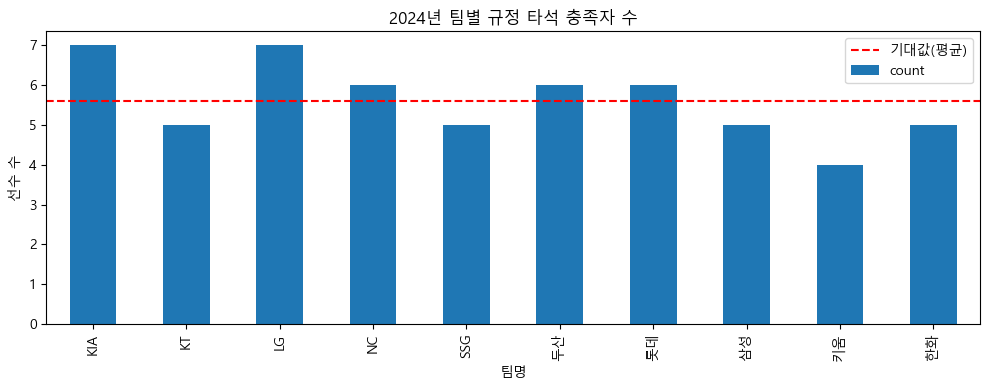

In [36]:
# 연도 컬럼에 있는 값들을 정렬하여 리스트로 가져오기
years = sorted(df['연도'].unique())

# 각 연도별로 반복
for year in years:
    # 해당 연도의 데이터만 필터링
    sub_df = df[df['연도'] == year]

    # 팀별 규정 타석 충족자 수 계산 (value_counts: 팀명 기준 선수 수 세기)
    team_counts = sub_df['팀명'].value_counts().sort_index()

    # 팀 수가 너무 적으면 (예: 1개 팀뿐이면) 검정이 불가능하므로 생략
    if len(team_counts) < 2:
        print(f"{year}년: 팀 수가 부족하여 검정 생략")
        continue

    # 기대값: 전체 충족자 수를 팀 수로 나눈 값으로 균등하게 설정
    expected = [team_counts.sum() / len(team_counts)] * len(team_counts)

    # 카이제곱 적합성 검정 수행
    chi_stat, p = chisquare(f_obs=team_counts.values, f_exp=expected)

    # 결과 출력
    print(f"\n[적합성 검정] {year}년 - 팀별 규정 타석 충족자 수")
    print(f"카이제곱 통계량 = {chi_stat:.2f}, p-value = {p:.4f}")

    # 유의수준 0.05 기준 해석
    if p < 0.05:
        print("=> 고르게 분포하지 않음 (유의)")
    else:
        print("=> 균등 분포로 볼 수 있음")
    
    # 시각화
    plt.figure(figsize=(10, 4))
    team_counts.plot(kind='bar')
    plt.axhline(y=sum(team_counts)/len(team_counts), color='red', linestyle='--', label='기대값(평균)')
    plt.title(f'{year}년 팀별 규정 타석 충족자 수')
    plt.ylabel('선수 수')
    plt.legend()
    plt.tight_layout()
    plt.show()


모든 연도 별로 팀 간에 규정 타석 충족사는 고르게 분포했다고 판단할 수 있음.

#### 1.2 타격유형 분포 적합성 검정 (연도별별)


[적합성 검정] 2021년 - 타격유형 분포 (양타 제외)
카이제곱 통계량 = 0.07, p-value = 0.7855
=> 좌타/우타 비율은 균등하게 분포


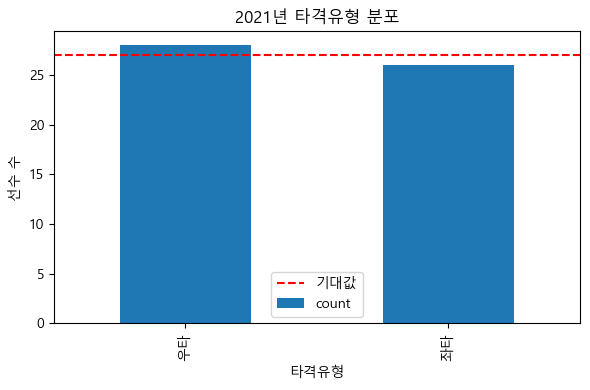


[적합성 검정] 2022년 - 타격유형 분포 (양타 제외)
카이제곱 통계량 = 0.17, p-value = 0.6803
=> 좌타/우타 비율은 균등하게 분포


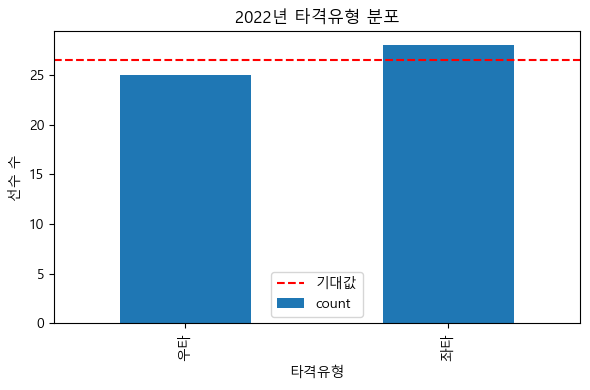


[적합성 검정] 2023년 - 타격유형 분포 (양타 제외)
카이제곱 통계량 = 0.08, p-value = 0.7728
=> 좌타/우타 비율은 균등하게 분포


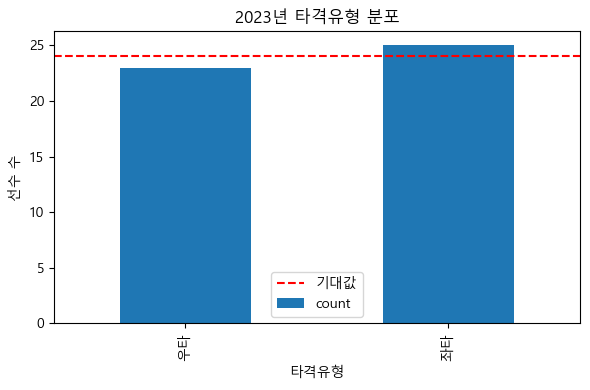


[적합성 검정] 2024년 - 타격유형 분포 (양타 제외)
카이제곱 통계량 = 0.08, p-value = 0.7815
=> 좌타/우타 비율은 균등하게 분포


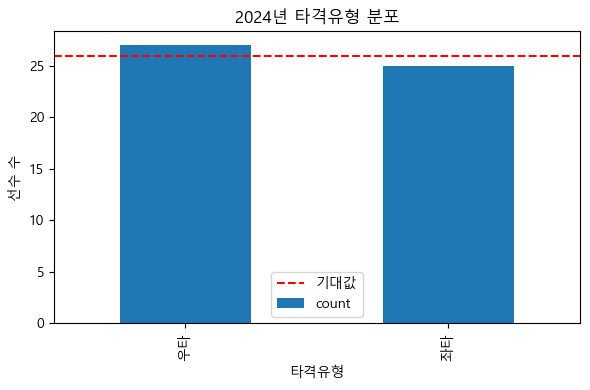

In [37]:
## 양타 포함X
for year in years:
    # 해당 연도 데이터 중 '좌타' 또는 '우타'
    sub_df = df[(df['연도'] == year) & (df['타격유형'].isin(['좌타', '우타']))]

    # 타격유형별 수 (양타는 이미 제외됨)
    type_counts = sub_df['타격유형'].value_counts().sort_index()

    # 좌타/우타 둘 중 하나라도 없다면 검정 불가
    if len(type_counts) != 2:
        print(f"{year}년: 좌타/우타 모두 포함되어 있지 않아 검정 생략")
        continue

    # 기대값: 전체 인원 수를 2로 나눈 균등 분포
    expected = [type_counts.sum() / 2] * 2

    # 카이제곱 적합성 검정
    chi_stat, p = chisquare(f_obs=type_counts.values, f_exp=expected)

    # 결과 출력
    print(f"\n[적합성 검정] {year}년 - 타격유형 분포 (양타 제외)")
    print(f"카이제곱 통계량 = {chi_stat:.2f}, p-value = {p:.4f}")

    if p < 0.05:
        print("=> 좌타/우타 비율이 균등하지 않음 (유의)")
    else:
        print("=> 좌타/우타 비율은 균등하게 분포")
        
    # 시각화   
    plt.figure(figsize=(6, 4))
    type_counts.plot(kind='bar')
    plt.axhline(y=type_counts.sum() / len(type_counts), color='red', linestyle='--', label='기대값')
    plt.title(f'{year}년 타격유형 분포')
    plt.ylabel('선수 수')
    plt.legend()
    plt.tight_layout()
    plt.show()

=> 균등하게 분포함을 알 수 있음.


[적합성 검정] 2021년 - 타격유형 분포
카이제곱 통계량 = 0.07, p-value = 0.7855
=> 타격유형 분포는 균등하다고 볼 수 있음


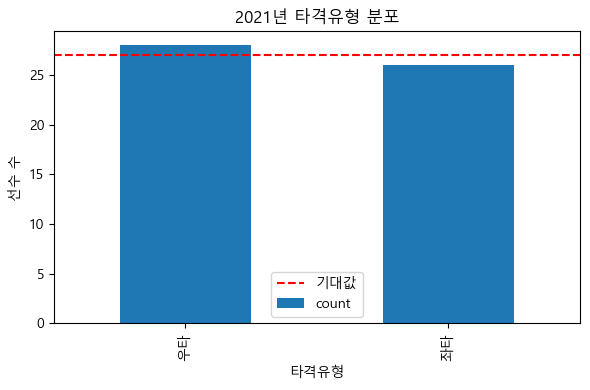


[적합성 검정] 2022년 - 타격유형 분포
카이제곱 통계량 = 0.17, p-value = 0.6803
=> 타격유형 분포는 균등하다고 볼 수 있음


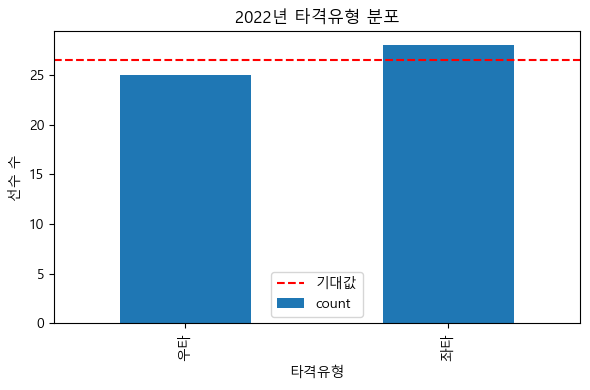


[적합성 검정] 2023년 - 타격유형 분포
카이제곱 통계량 = 19.48, p-value = 0.0001
=> 타격유형 분포가 고르지 않음 (유의)


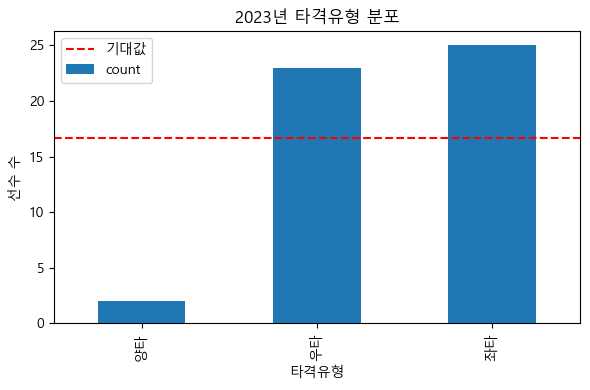


[적합성 검정] 2024년 - 타격유형 분포
카이제곱 통계량 = 17.39, p-value = 0.0002
=> 타격유형 분포가 고르지 않음 (유의)


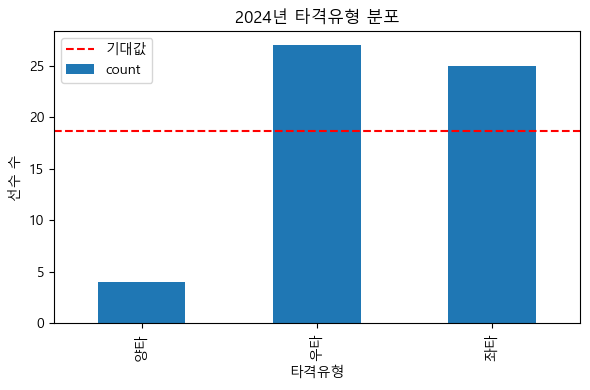

In [38]:
## 양타 포함
for year in years:
    # 해당 연도 데이터 필터링
    sub_df = df[df['연도'] == year]

    # 타격유형별 인원 수 집계 (예: 좌타, 우타, 양타)
    type_counts = sub_df['타격유형'].value_counts().sort_index()

    # 타격유형이 1개뿐이면 카이제곱 검정 불가능 → 생략
    if len(type_counts) < 2:
        print(f"{year}년: 타격유형 종류가 부족하여 검정 생략")
        continue

    # 기대값: 전체 인원 수를 타격유형 수로 나눈 값 (균등분포 가정)
    expected = [type_counts.sum() / len(type_counts)] * len(type_counts)

    # 카이제곱 적합성 검정 실행
    chi_stat, p = chisquare(f_obs=type_counts.values, f_exp=expected)

    # 결과 출력
    print(f"\n[적합성 검정] {year}년 - 타격유형 분포")
    print(f"카이제곱 통계량 = {chi_stat:.2f}, p-value = {p:.4f}")

    # 유의수준 0.05 기준 해석
    if p < 0.05:
        print("=> 타격유형 분포가 고르지 않음 (유의)")
    else:
        print("=> 타격유형 분포는 균등하다고 볼 수 있음")
        
    # 시각화   
    plt.figure(figsize=(6, 4))
    type_counts.plot(kind='bar')
    plt.axhline(y=type_counts.sum() / len(type_counts), color='red', linestyle='--', label='기대값')
    plt.title(f'{year}년 타격유형 분포')
    plt.ylabel('선수 수')
    plt.legend()
    plt.tight_layout()
    plt.show()

### [2] 독립성 검정: 범주형 변수 간 독립성 검정

#### 2.1 팀별 타격유형의 독립성 검정
귀무가설(H0): 팀명과 타격유형은 독립이다 (특화된 팀이 존재하는 것은 아니다)  
대립가설(H1): 팀명과 타격유형은 독립이 아니다 (특화된 팀이 존재한다)


[독립성 검정] 2021년 - 팀명 vs 타격유형
카이제곱 통계량 = 10.39, 자유도 = 9, p-value = 0.3200
=> 팀과 타격유형은 독립적이라 볼 수 있음


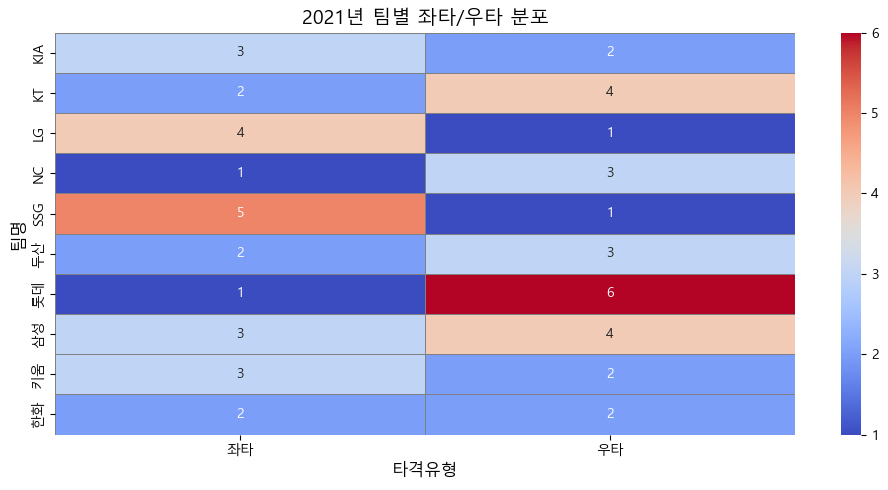


[독립성 검정] 2022년 - 팀명 vs 타격유형
카이제곱 통계량 = 9.81, 자유도 = 9, p-value = 0.3658
=> 팀과 타격유형은 독립적이라 볼 수 있음


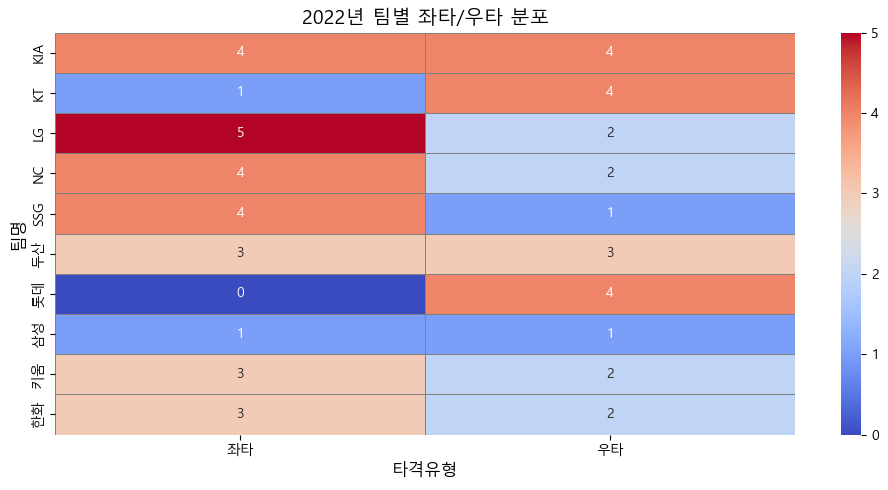


[독립성 검정] 2023년 - 팀명 vs 타격유형
카이제곱 통계량 = 8.26, 자유도 = 9, p-value = 0.5077
=> 팀과 타격유형은 독립적이라 볼 수 있음


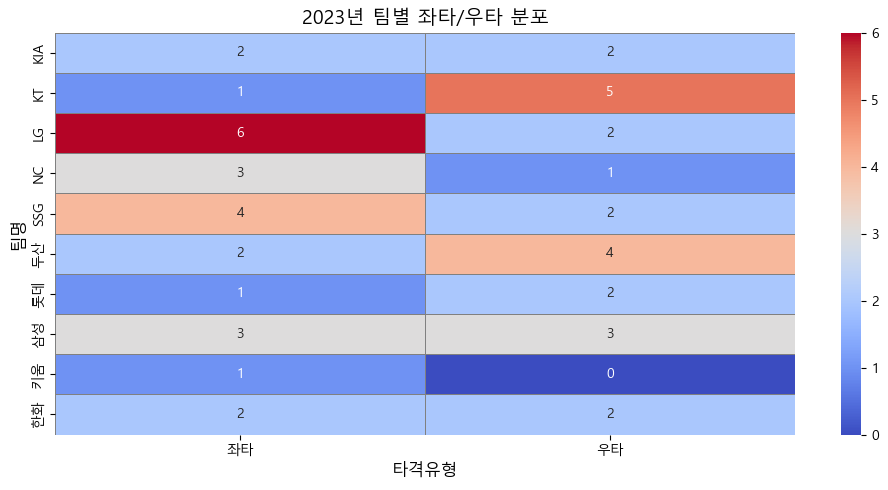


[독립성 검정] 2024년 - 팀명 vs 타격유형
카이제곱 통계량 = 13.44, 자유도 = 9, p-value = 0.1438
=> 팀과 타격유형은 독립적이라 볼 수 있음


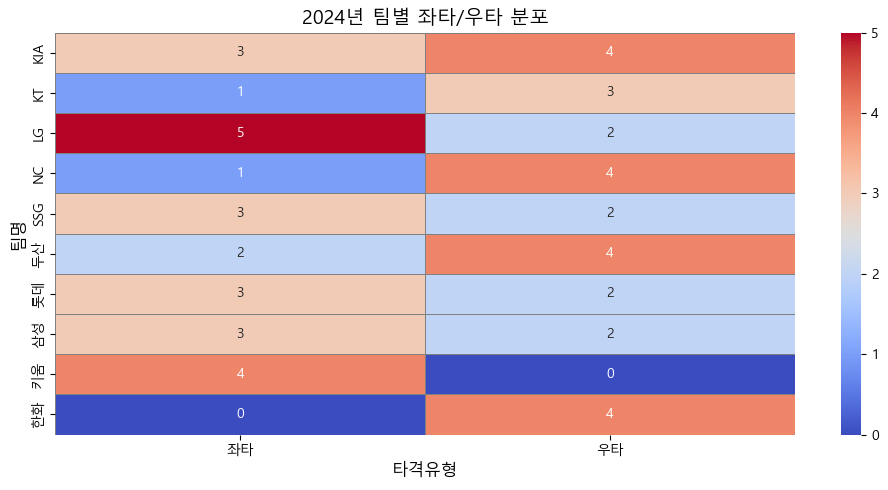

In [39]:
for year in years:
    # 해당 연도 + 타격유형이 좌타/우타만 포함되도록 필터링
    sub_df = df[(df['연도'] == year) & (df['타격유형'].isin(['좌타', '우타']))]

    # 교차표 생성: 팀명 x 타격유형
    crosstab = pd.crosstab(sub_df['팀명'], sub_df['타격유형'])

    # 팀 수 또는 타격유형 수가 부족할 경우 생략
    if crosstab.shape[0] < 2 or crosstab.shape[1] != 2:
        print(f"{year}년: 데이터 부족으로 검정 생략")
        continue

    # 열 순서 고정: 좌타 → 우타
    if set(['좌타', '우타']).issubset(crosstab.columns):
        crosstab = crosstab[['좌타', '우타']]

    # 카이제곱 독립성 검정
    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"\n[독립성 검정] {year}년 - 팀명 vs 타격유형")
    print(f"카이제곱 통계량 = {chi2:.2f}, 자유도 = {dof}, p-value = {p:.4f}")

    if p < 0.05:
        print("=> 팀에 따라 타격유형 분포가 유의하게 다름 (독립 아님)")
    else:
        print("=> 팀과 타격유형은 독립적이라 볼 수 있음")

    # 히트맵 시각화 개선
    plt.figure(figsize=(10, 5))
    sns.heatmap(crosstab, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5, linecolor='gray')
    plt.title(f"{year}년 팀별 좌타/우타 분포", fontsize=14)
    plt.xlabel("타격유형", fontsize=12)
    plt.ylabel("팀명", fontsize=12)
    plt.tight_layout()
    plt.show()

#### 2.2 포지션별 삼진 수 차이 검정
H0: 포지션별로 삼진 수의 평균에 차이가 없다.  
H1: 포지션별로 삼진 수의 평균에 차이가 있다.

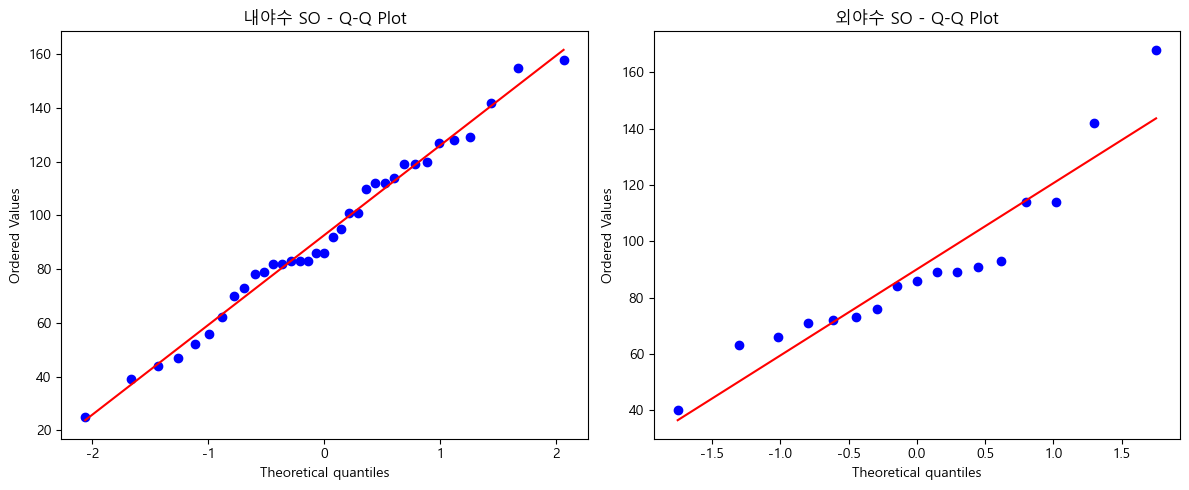

In [40]:
# 정규성 검정
infield_SO = sub_df[sub_df['포지션'] == '내야수']['SO']
outfield_SO = sub_df[sub_df['포지션'] == '외야수']['SO']

# Q-Q Plot 시각화
plt.figure(figsize=(12, 5))

# 내야수
plt.subplot(1, 2, 1)
probplot(infield_SO, dist="norm", plot=plt)
plt.title("내야수 SO - Q-Q Plot")

# 외야수
plt.subplot(1, 2, 2)
probplot(outfield_SO, dist="norm", plot=plt)
plt.title("외야수 SO - Q-Q Plot")

plt.tight_layout()
plt.show()

정규분포를 따른다고 볼 수 있음.


[삼진 차이 검정] 2021년 - 내야수 vs 외야수
t-통계량 = -0.45, p-value = 0.6557
=> 내야수와 외야수의 삼진 수는 통계적으로 유사함


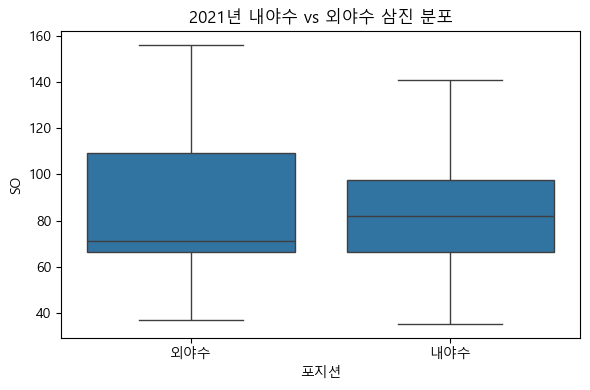


[삼진 차이 검정] 2022년 - 내야수 vs 외야수
t-통계량 = -0.87, p-value = 0.3909
=> 내야수와 외야수의 삼진 수는 통계적으로 유사함


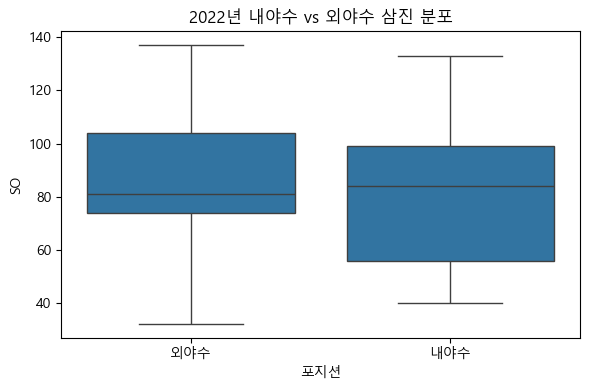


[삼진 차이 검정] 2023년 - 내야수 vs 외야수
t-통계량 = 0.11, p-value = 0.9093
=> 내야수와 외야수의 삼진 수는 통계적으로 유사함


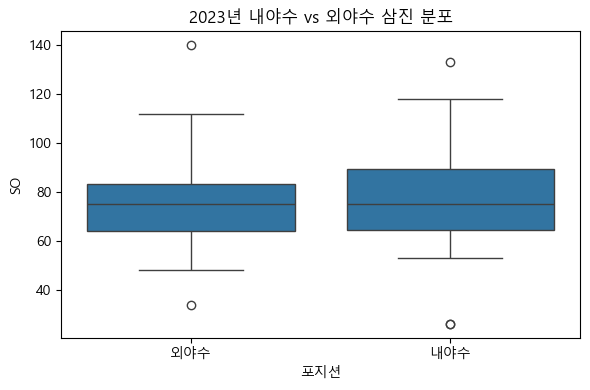


[삼진 차이 검정] 2024년 - 내야수 vs 외야수
t-통계량 = 0.04, p-value = 0.9682
=> 내야수와 외야수의 삼진 수는 통계적으로 유사함


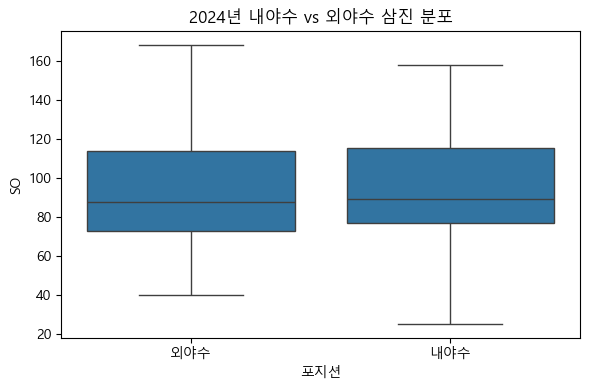

In [41]:
for year in years:
    sub_df = df[(df['연도'] == year) & (df['포지션'].isin(['내야수', '외야수']))]
    sub_df = sub_df.dropna(subset=['SO'])  # 삼진 결측치 제거

    # 내야수 / 외야수 그룹 나누기
    infield_SO = sub_df[sub_df['포지션'] == '내야수']['SO']
    outfield_SO = sub_df[sub_df['포지션'] == '외야수']['SO']

    # 검정 수행 조건 확인
    if len(infield_SO) < 2 or len(outfield_SO) < 2:
        print(f"{year}년: 그룹 데이터 수 부족으로 검정 생략")
        continue

    # t-검정 수행
    t_stat, p = ttest_ind(infield_SO, outfield_SO, equal_var=False)

    print(f"\n[삼진 차이 검정] {year}년 - 내야수 vs 외야수")
    print(f"t-통계량 = {t_stat:.2f}, p-value = {p:.4f}")

    if p < 0.05:
        print("=> 내야수와 외야수의 삼진 수 평균에 유의한 차이 있음")
    else:
        print("=> 내야수와 외야수의 삼진 수는 통계적으로 유사함")
        
    # 시각화
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='포지션', y='SO', data=sub_df)
    plt.title(f"{year}년 내야수 vs 외야수 삼진 분포")
    plt.tight_layout()
    plt.show()

포지션 분포에 관계없이 삼진수는 정규성을 따르고 유사함

#### 2.3 연도별 팀 순위와 타격유형 사이의 독립성 검정정


 2021년 팀순위 기준 그룹
상위권 팀 (1~5위): KT, 삼성, 두산, LG, 키움
하위권 팀 (6~10위): SSG, NC, 롯데, KIA, 한화
--------------------------------------------------
[독립성 검정] 팀순위(상/하위) vs 타격유형 (좌/우/양타)
카이제곱 통계량 = 0.00, 자유도 = 1, p-value = 0.9919
=> 순위와 타격유형은 독립적 (연관 없음)


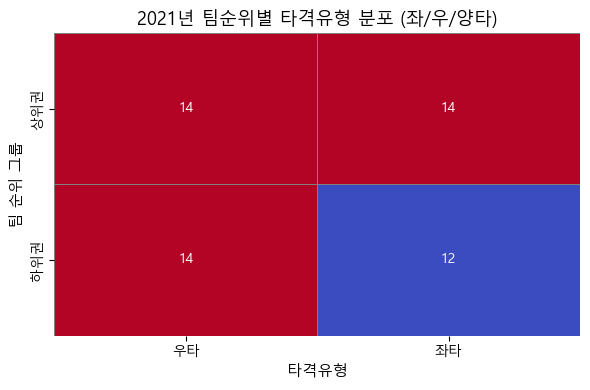


 2022년 팀순위 기준 그룹
상위권 팀 (1~5위): SSG, LG, 키움, KT, KIA
하위권 팀 (6~10위): NC, 삼성, 롯데, 두산, 한화
--------------------------------------------------
[독립성 검정] 팀순위(상/하위) vs 타격유형 (좌/우/양타)
카이제곱 통계량 = 0.13, 자유도 = 1, p-value = 0.7178
=> 순위와 타격유형은 독립적 (연관 없음)


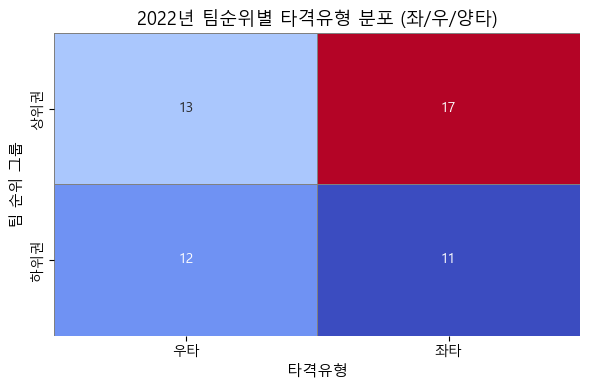


 2023년 팀순위 기준 그룹
상위권 팀 (1~5위): LG, KT, SSG, NC, 두산
하위권 팀 (6~10위): KIA, 롯데, 삼성, 한화, 키움
--------------------------------------------------
[독립성 검정] 팀순위(상/하위) vs 타격유형 (좌/우/양타)
카이제곱 통계량 = 1.22, 자유도 = 2, p-value = 0.5426
=> 순위와 타격유형은 독립적 (연관 없음)


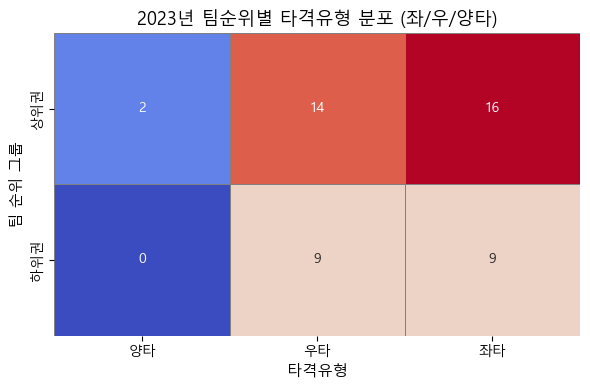


 2024년 팀순위 기준 그룹
상위권 팀 (1~5위): KIA, 삼성, LG, 두산, KT
하위권 팀 (6~10위): SSG, 롯데, 한화, NC, 키움
--------------------------------------------------
[독립성 검정] 팀순위(상/하위) vs 타격유형 (좌/우/양타)
카이제곱 통계량 = 1.41, 자유도 = 2, p-value = 0.4929
=> 순위와 타격유형은 독립적 (연관 없음)


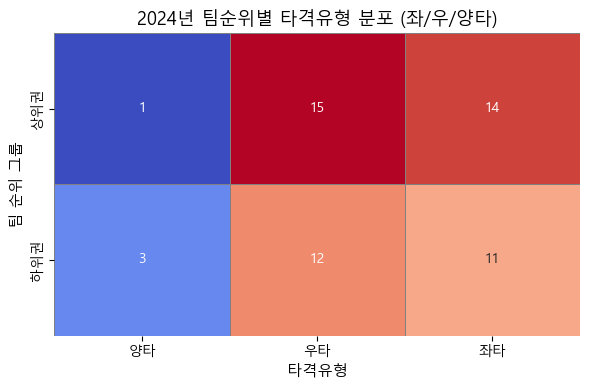

In [49]:
for year in years:
    # 해당 연도 전체 데이터 사용 (좌타/우타/양타 모두 포함)
    sub_df = df[df['연도'] == year].copy()

    # 상위권/하위권 그룹 부여
    sub_df['순위그룹'] = sub_df['팀순위'].apply(lambda x: '상위권' if x <= 5 else '하위권')

    # 실제 상/하위권 팀명 출력
    team_rank_df = sub_df[['팀명', '팀순위']].drop_duplicates().sort_values('팀순위')
    상위팀 = team_rank_df[team_rank_df['팀순위'] <= 5]['팀명'].tolist()
    하위팀 = team_rank_df[team_rank_df['팀순위'] > 5]['팀명'].tolist()

    print(f"\n {year}년 팀순위 기준 그룹")
    print(f"상위권 팀 (1~5위): {', '.join(상위팀)}")
    print(f"하위권 팀 (6~10위): {', '.join(하위팀)}")
    print("-" * 50)
    
    # 교차표 생성: 순위그룹 × 타격유형 (좌/우/양타 포함)
    crosstab = pd.crosstab(sub_df['순위그룹'], sub_df['타격유형'])

    # 그룹이나 유형이 부족하면 생략
    if crosstab.shape[0] < 2 or crosstab.shape[1] < 2:
        print(f"{year}년: 그룹 부족으로 검정 생략")
        continue

    # 독립성 검정
    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"[독립성 검정] 팀순위(상/하위) vs 타격유형 (좌/우/양타)")
    print(f"카이제곱 통계량 = {chi2:.2f}, 자유도 = {dof}, p-value = {p:.4f}")

    if p < 0.05:
        print("=> 순위에 따라 타격유형 분포가 유의하게 다름 (독립 아님)")
    else:
        print("=> 순위와 타격유형은 독립적 (연관 없음)")

    # 시각화
    plt.figure(figsize=(6, 4))
    sns.heatmap(
        crosstab, annot=True, fmt='d', cmap='coolwarm',
        linewidths=0.5, linecolor='gray', cbar=False
    )
    plt.title(f"{year}년 팀순위별 타격유형 분포 (좌/우/양타)", fontsize=13)
    plt.xlabel("타격유형", fontsize=11)
    plt.ylabel("팀 순위 그룹", fontsize=11)
    plt.tight_layout()
    plt.show()

### [3] 동질성 검정: 두 그룹 간 분포 유사성 검정

- 'OPS': 출루율(OBP)과 장타율(SLG)을 더한 지표로, 타자의 전체적인 공격력을 나타냄
- 'OBP': 출루율 (On-Base Percentage), 타자가 출루한 비율
- 'SLG': 장타율 (Slugging Percentage), 타자의 장타 능력을 나타내는 지표
- 'AVG': 타율 (Batting Average), 안타를 기록한 비율
- 'RBI': 타점 (Runs Batted In), 타자가 주자를 홈으로 불러들인 횟수
- 'HR': 홈런 (Home Runs), 타자가 친 홈런의 개수
- 'BB': 볼넷 (Base on Balls), 타자가 볼넷으로 출루한 횟수
- 'SO': 삼진 (Strikeouts), 타자가 삼진으로 아웃된 횟수

In [70]:
# Q-Q Plot 함수화화
def plot_qq(stat_col):
    print(f"\n [정규성 시각화] 변수: {stat_col}")
    for year in years:
        # 해당 연도의 stat_col 값이 존재하는 데이터 필터링
        sub_df = df[(df['연도'] == year) & df[stat_col].notna()].copy()

        # 상위권/하위권 분류
        sub_df['순위그룹'] = sub_df['팀순위'].apply(lambda x: '상위권' if x <= 5 else '하위권')

        high_group = sub_df[sub_df['순위그룹'] == '상위권'][stat_col]
        low_group = sub_df[sub_df['순위그룹'] == '하위권'][stat_col]

        # 그룹별 샘플 수가 너무 적으면 Q-Q Plot 생략
        if len(high_group) < 3 or len(low_group) < 3:
            print(f"{year}년: Q-Q plot 생략 (데이터 부족)")
            continue

        # Q-Q Plot 시각화
        plt.figure(figsize=(12, 2))
        
        # 상위권 그룹의 정규성 시각화
        plt.subplot(1, 2, 1)
        probplot(high_group, dist="norm", plot=plt)
        plt.title(f"{year}년 상위권 {stat_col} - Q-Q Plot")

        # 하위권 그룹의 정규성 시각화
        plt.subplot(1, 2, 2)
        probplot(low_group, dist="norm", plot=plt)
        plt.title(f"{year}년 하위권 {stat_col} - Q-Q Plot")

        # 레이아웃 자동 조정
        plt.tight_layout()
        plt.show()

In [71]:
def ttest_and_boxplot(stat_col):
    print(f"\n [독립표본 t-검정] 변수: {stat_col}")
    for year in years:
        # 해당 연도에서 stat_col 값이 결측이 아닌 데이터만 필터링
        sub_df = df[(df['연도'] == year) & df[stat_col].notna()].copy()

        # 상위권/하위권 분류
        sub_df.loc[:, '순위그룹'] = sub_df['팀순위'].apply(lambda x: '상위권' if x <= 5 else '하위권')

        group_high = sub_df[sub_df['순위그룹'] == '상위권'][stat_col]
        group_low = sub_df[sub_df['순위그룹'] == '하위권'][stat_col]

        # 데이터가 부족할 경우 생략
        if len(group_high) < 2 or len(group_low) < 2:
            print(f"{year}년: 검정 생략 (데이터 부족)")
            continue

        # 독립표본 t-검정 (equal_var=False: Welch's t-test)
        t_stat, p = ttest_ind(group_high, group_low, equal_var=False)

        print(f"\n{year}년 {stat_col} 독립표본 t-검정")
        print(f"t-통계량 = {t_stat:.2f}, p-value = {p:.4f}")
        if p < 0.05:
            print("=> 상/하위권 팀 간 평균에 유의미한 차이 있음")
        else:
            print("=> 상/하위권 팀 간 평균은 통계적으로 유사함")

        # 박스플롯 시각화
        plt.figure(figsize=(6, 4))
        sns.boxplot(x='순위그룹', y=stat_col, data=sub_df)
        plt.title(f"{year}년 {stat_col} 분포 (상위권 vs 하위권)")
        plt.tight_layout()
        plt.show()

#### 팀 순위 그룹별 타격 지표 비교

##### 3.1 상/하위권 팀의 OPS 차이 검정
H0: 상하위권의 OPS 평균은 동일하다.  
H1: 상하위권의 OPS 평균은 동일하지 않다.


 [정규성 시각화] 변수: OPS


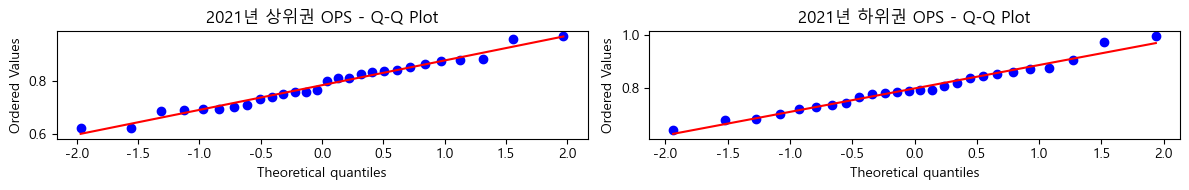

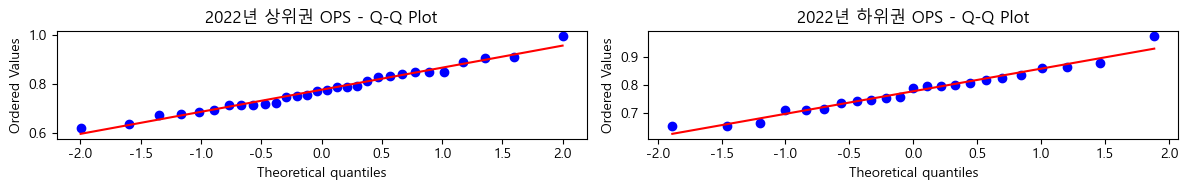

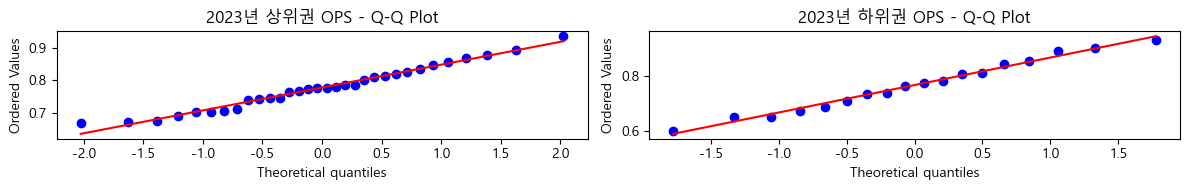

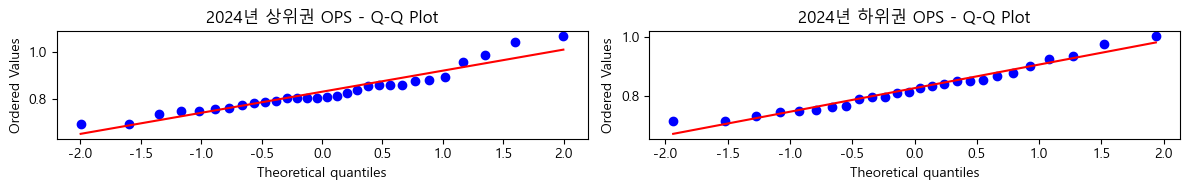

In [73]:
plot_qq('OPS')

정규성을 만족한다는 것을 알 수 있음.


 [독립표본 t-검정] 변수: OPS

2021년 OPS 독립표본 t-검정
t-통계량 = -0.56, p-value = 0.5803
=> 상/하위권 팀 간 평균은 통계적으로 유사함


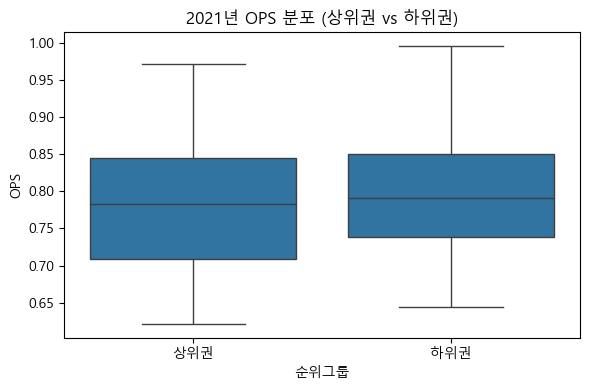


2022년 OPS 독립표본 t-검정
t-통계량 = -0.05, p-value = 0.9595
=> 상/하위권 팀 간 평균은 통계적으로 유사함


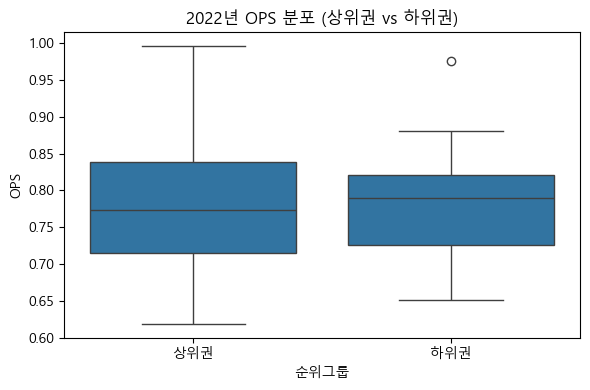


2023년 OPS 독립표본 t-검정
t-통계량 = 0.48, p-value = 0.6338
=> 상/하위권 팀 간 평균은 통계적으로 유사함


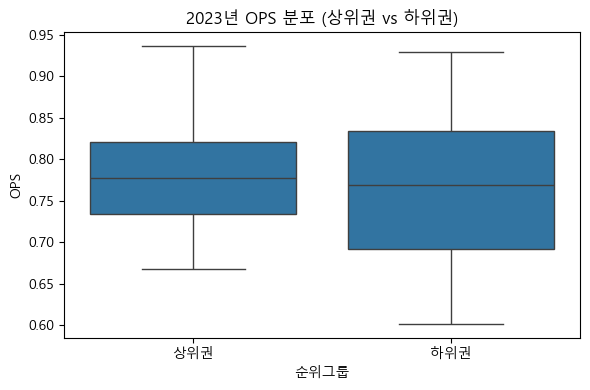


2024년 OPS 독립표본 t-검정
t-통계량 = 0.15, p-value = 0.8802
=> 상/하위권 팀 간 평균은 통계적으로 유사함


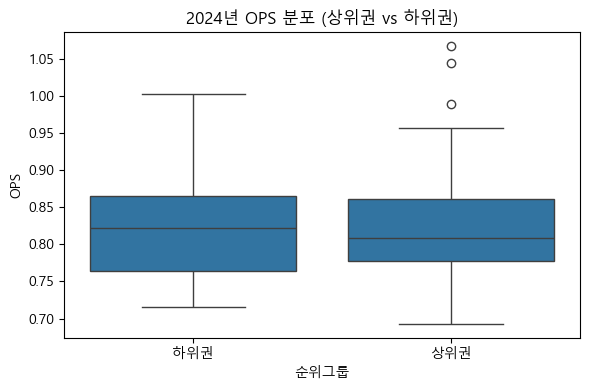

In [74]:
ttest_and_boxplot('OPS')

=> OPS와 상하위 팀 간의 유의미한 차이가 존재하지 않음.  
=> 팀 성적이 OPS에 의해서만 결정되지 않는 것을 의미

##### 3.2 상/하위권 팀의 OBP 차이 검정: 출루율
H0: 상하위권의 OBP 평균은 동일하다.  
H1: 상하위권의 OBP 평균은 동일하지 않다.


 [정규성 시각화] 변수: OBP


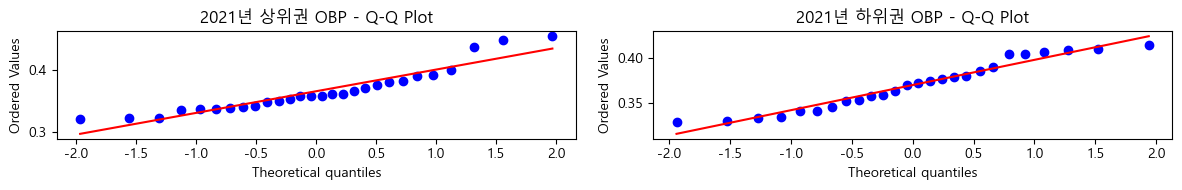

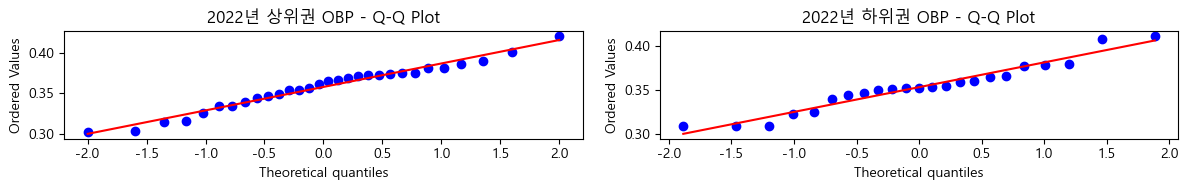

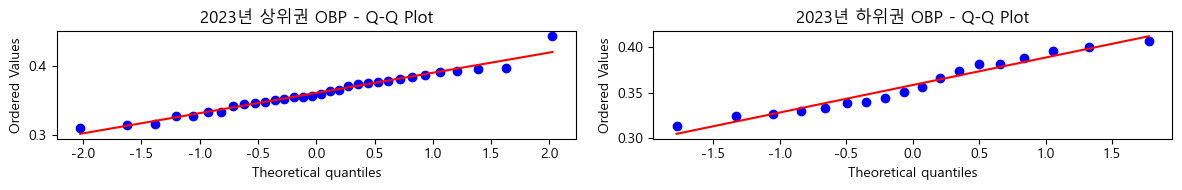

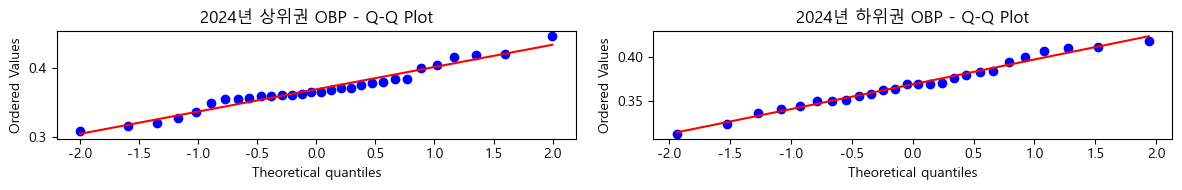

In [75]:
plot_qq('OBP')

정규성을 만족한다는 것을 알 수 있음.


 [독립표본 t-검정] 변수: OBP

2021년 OBP 독립표본 t-검정
t-통계량 = -0.48, p-value = 0.6314
=> 상/하위권 팀 간 평균은 통계적으로 유사함


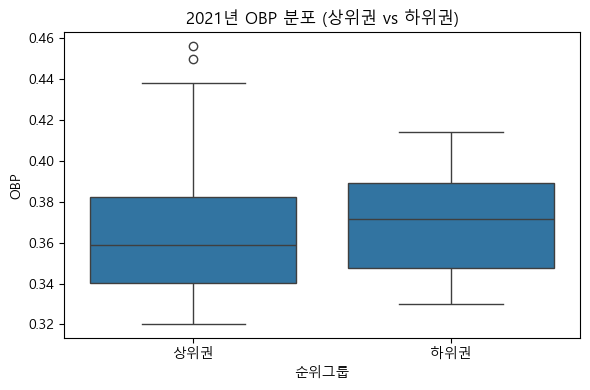


2022년 OBP 독립표본 t-검정
t-통계량 = 0.61, p-value = 0.5447
=> 상/하위권 팀 간 평균은 통계적으로 유사함


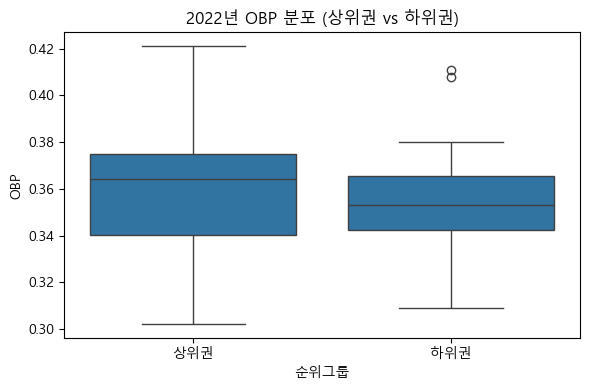


2023년 OBP 독립표본 t-검정
t-통계량 = 0.35, p-value = 0.7283
=> 상/하위권 팀 간 평균은 통계적으로 유사함


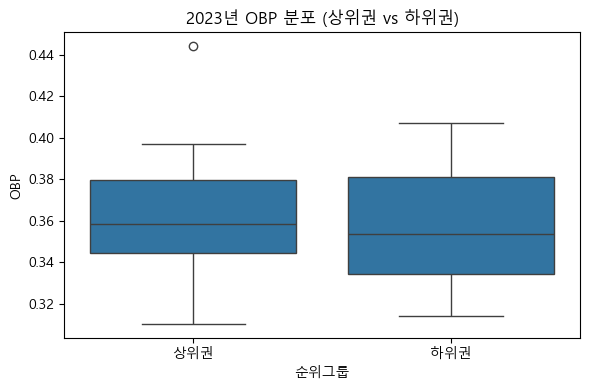


2024년 OBP 독립표본 t-검정
t-통계량 = 0.05, p-value = 0.9610
=> 상/하위권 팀 간 평균은 통계적으로 유사함


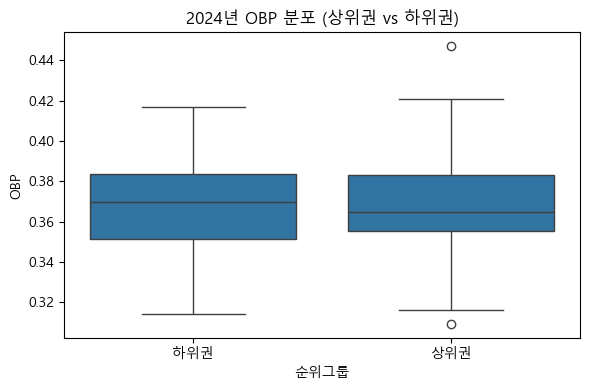

In [76]:
ttest_and_boxplot('OBP')

=> OBP 또한한 상하위 팀 간의 유의미한 차이가 존재하지 않음.  
=> 팀 성적이 OBP에 의해서만 결정되지 않는 것을 의미

##### 3.3 상/하위권 팀의 SLG 차이 검정: 장타율
H0: 상하위권의 SLG 평균은 동일하다.  
H1: 상하위권의 SLG 평균은 동일하지 않다.


 [정규성 시각화] 변수: SLG


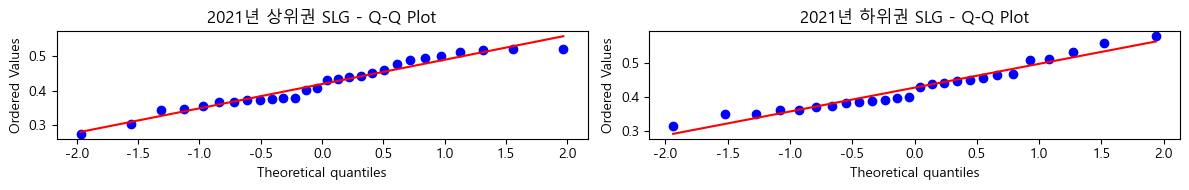

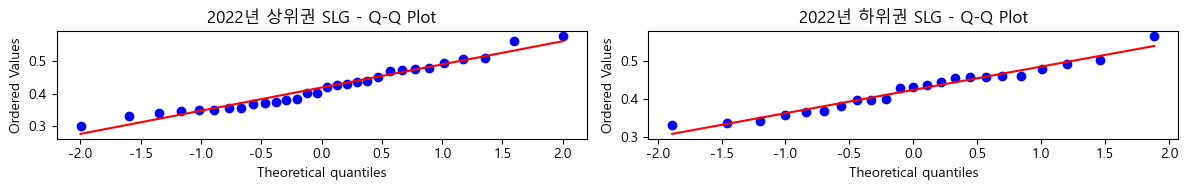

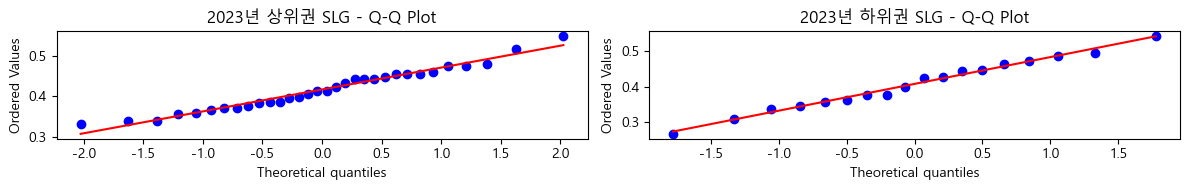

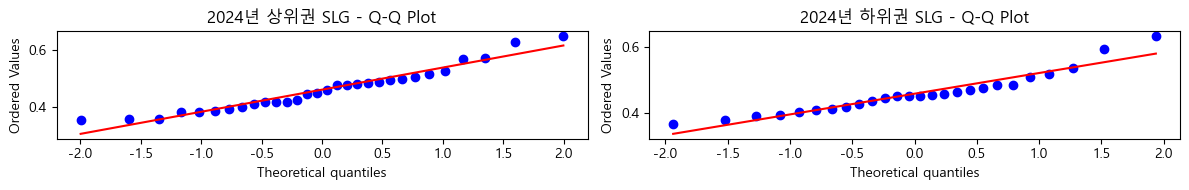

In [77]:
plot_qq('SLG')

정규성을 만족함


 [독립표본 t-검정] 변수: SLG

2021년 SLG 독립표본 t-검정
t-통계량 = -0.49, p-value = 0.6292
=> 상/하위권 팀 간 평균은 통계적으로 유사함


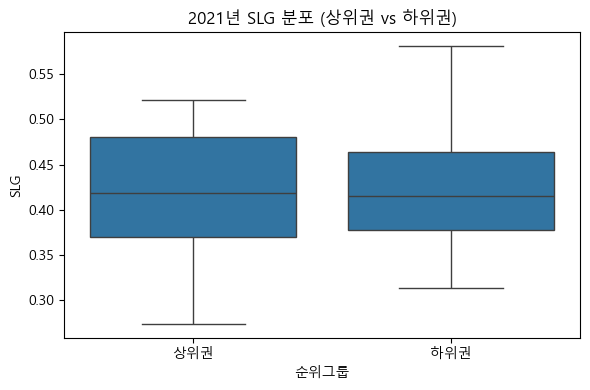


2022년 SLG 독립표본 t-검정
t-통계량 = -0.33, p-value = 0.7413
=> 상/하위권 팀 간 평균은 통계적으로 유사함


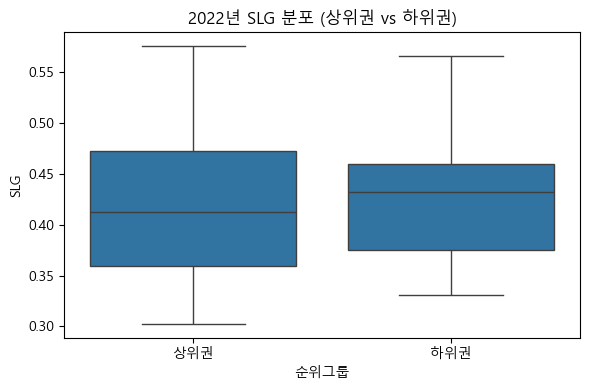


2023년 SLG 독립표본 t-검정
t-통계량 = 0.48, p-value = 0.6364
=> 상/하위권 팀 간 평균은 통계적으로 유사함


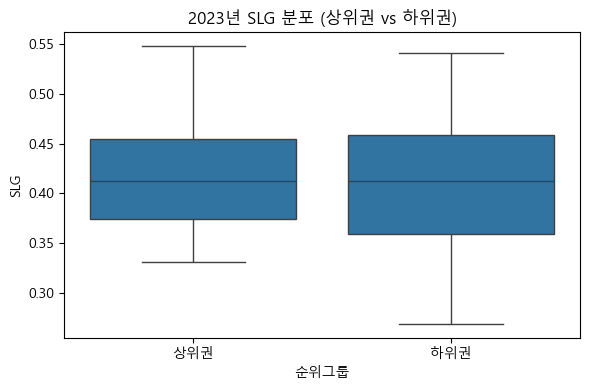


2024년 SLG 독립표본 t-검정
t-통계량 = 0.16, p-value = 0.8715
=> 상/하위권 팀 간 평균은 통계적으로 유사함


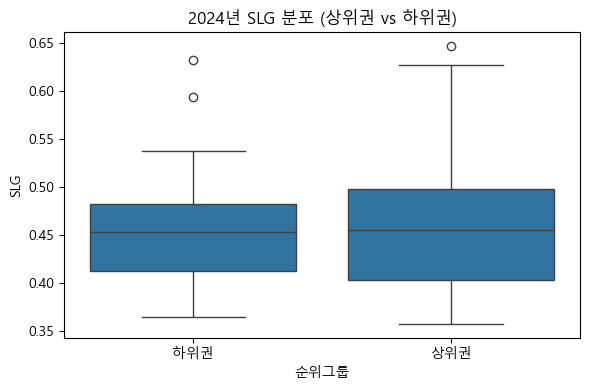

In [78]:
ttest_and_boxplot('SLG')

=> 마찬가지로 SLG 또한 상하위권에 따라 유의미한 차이를 보이지 않음음

##### 3.4 상/하위권 팀의 AVG 차이 검정: 평균 타율
H0: 상하위권의 AVG 평균은 동일하다.  
H1: 상하위권의 AVG 평균은 동일하지 않다.


 [정규성 시각화] 변수: AVG


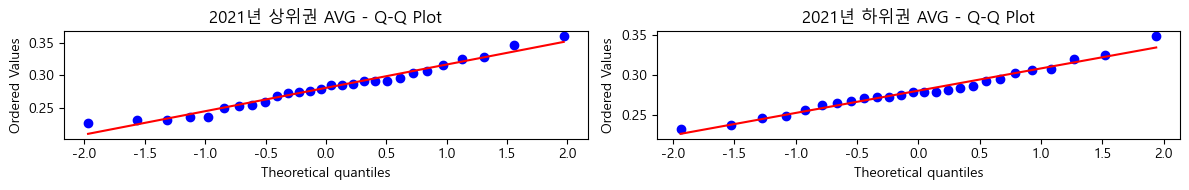

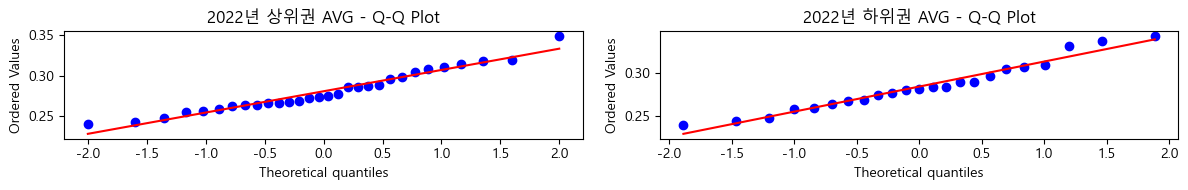

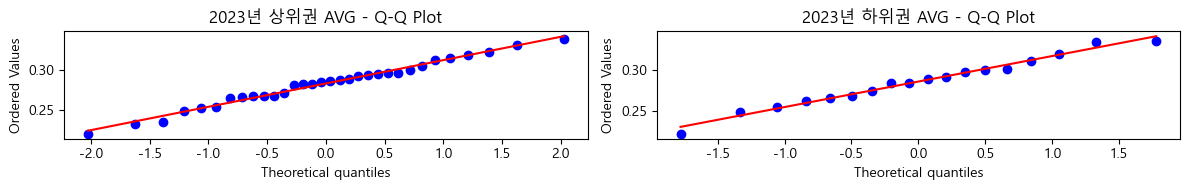

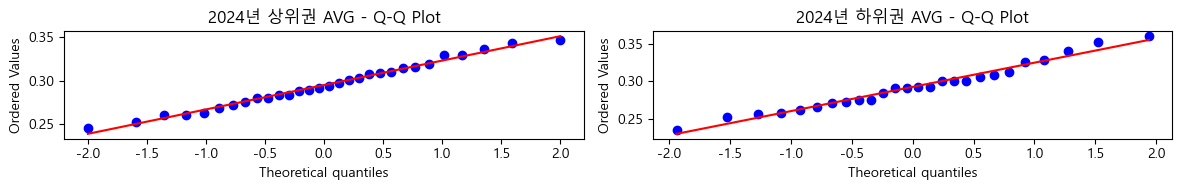

In [79]:
plot_qq('AVG')

정규성 만족함


 [독립표본 t-검정] 변수: AVG

2021년 AVG 독립표본 t-검정
t-통계량 = 0.04, p-value = 0.9675
=> 상/하위권 팀 간 평균은 통계적으로 유사함


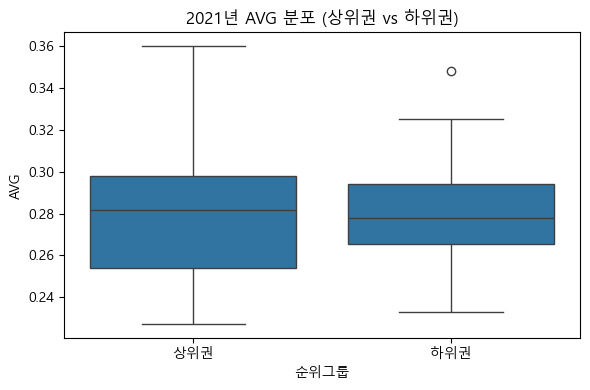


2022년 AVG 독립표본 t-검정
t-통계량 = -0.42, p-value = 0.6746
=> 상/하위권 팀 간 평균은 통계적으로 유사함


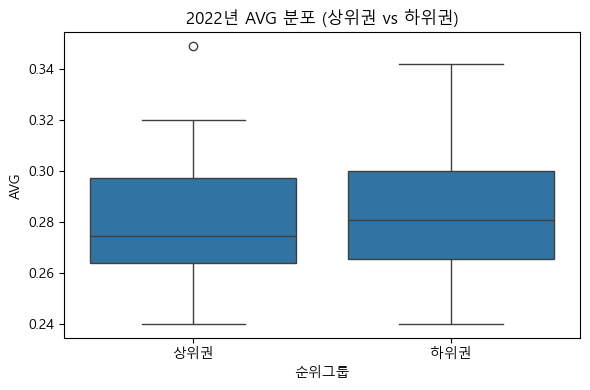


2023년 AVG 독립표본 t-검정
t-통계량 = -0.33, p-value = 0.7403
=> 상/하위권 팀 간 평균은 통계적으로 유사함


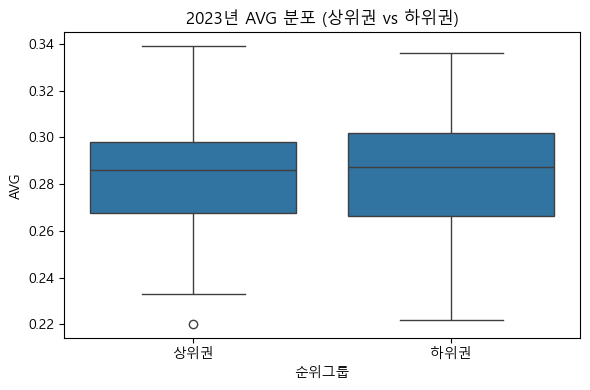


2024년 AVG 독립표본 t-검정
t-통계량 = 0.28, p-value = 0.7795
=> 상/하위권 팀 간 평균은 통계적으로 유사함


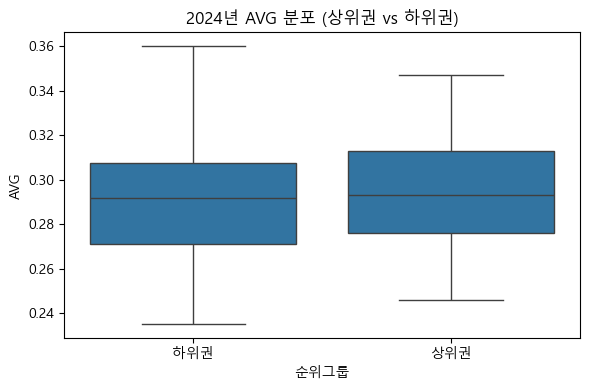

In [80]:
ttest_and_boxplot('AVG')

=> AVG 또한 상하위권에 영향을 크게 받지 않음

##### 3.5 상/하위권 팀의 RBI 차이 검정: 타점
H0: 상하위권의 RBI 평균은 동일하다.  
H1: 상하위권의 RBI 평균은 동일하지 않다.


 [정규성 시각화] 변수: RBI


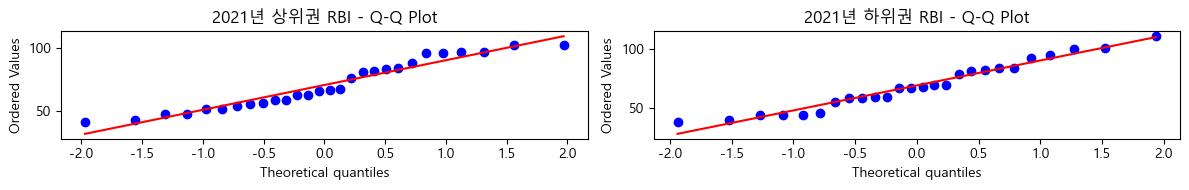

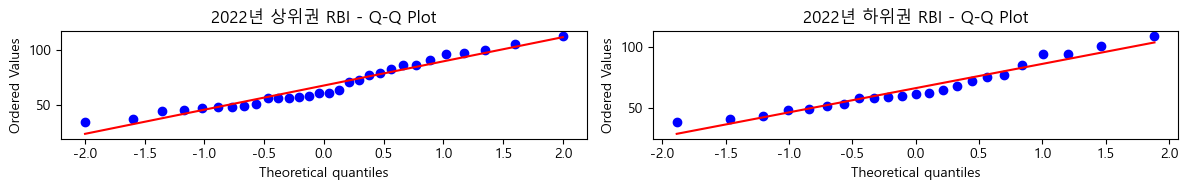

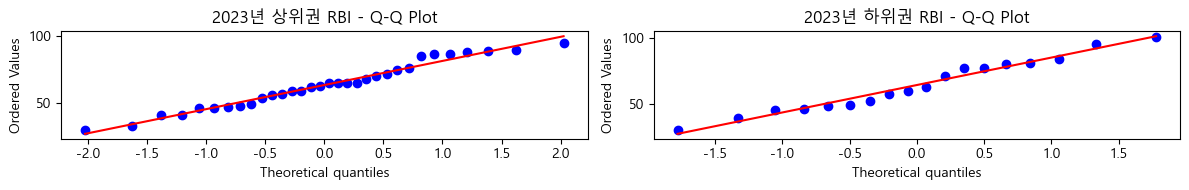

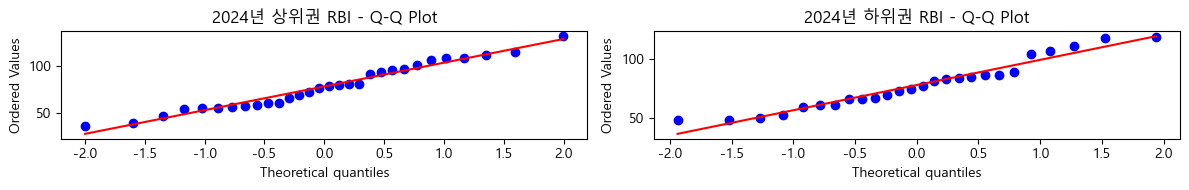

In [82]:
plot_qq('RBI')

정규성 만족


 [독립표본 t-검정] 변수: RBI

2021년 RBI 독립표본 t-검정
t-통계량 = 0.33, p-value = 0.7390
=> 상/하위권 팀 간 평균은 통계적으로 유사함


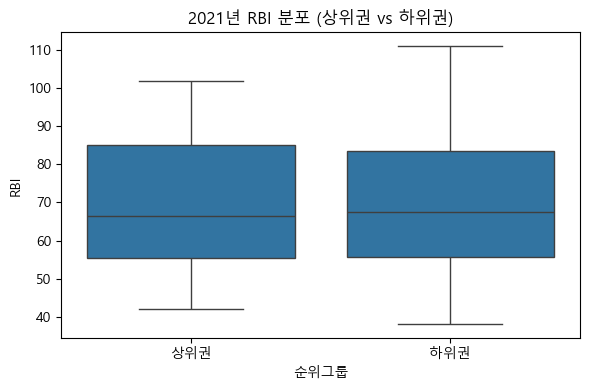


2022년 RBI 독립표본 t-검정
t-통계량 = 0.29, p-value = 0.7711
=> 상/하위권 팀 간 평균은 통계적으로 유사함


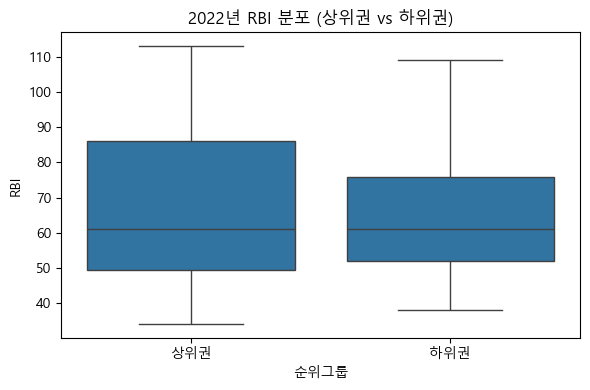


2023년 RBI 독립표본 t-검정
t-통계량 = -0.12, p-value = 0.9038
=> 상/하위권 팀 간 평균은 통계적으로 유사함


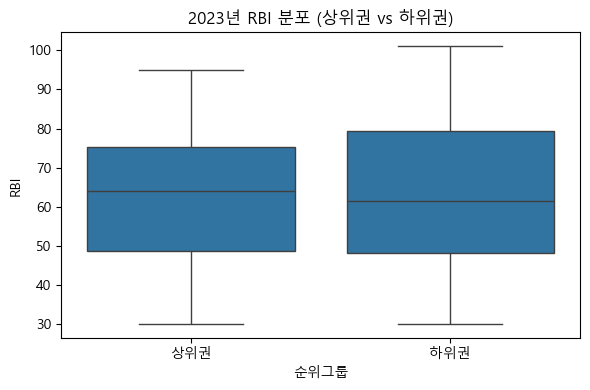


2024년 RBI 독립표본 t-검정
t-통계량 = 0.05, p-value = 0.9598
=> 상/하위권 팀 간 평균은 통계적으로 유사함


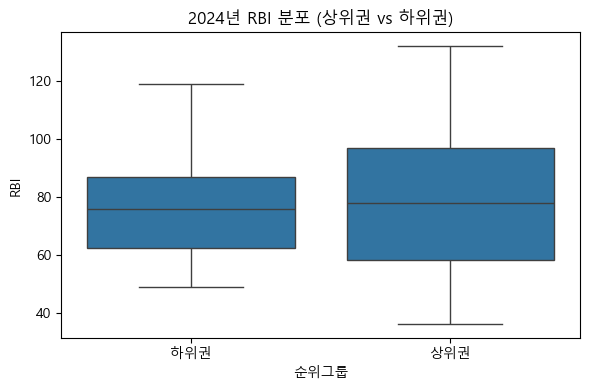

In [83]:
ttest_and_boxplot('RBI')

=> 마찬가지로 그룹간 차이 존재 X

##### 3.6 상/하위권 팀의 HR 차이 검정: 홈런
H0: 상하위권의 HR 평균은 동일하다.  
H1: 상하위권의 HR 평균은 동일하지 않다.


 [정규성 시각화] 변수: HR


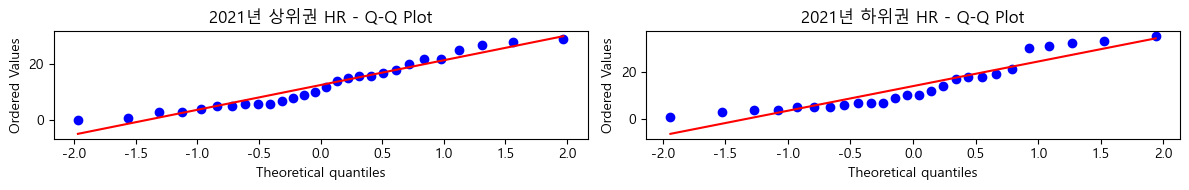

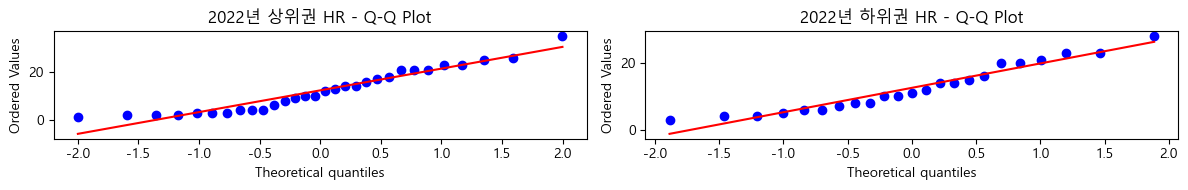

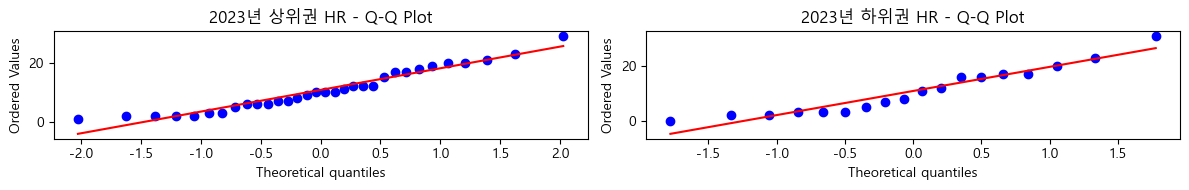

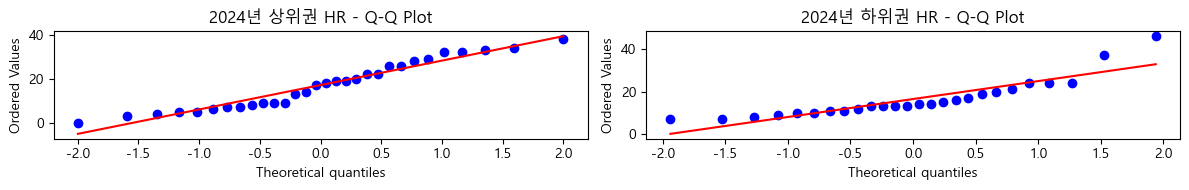

In [84]:
plot_qq('HR')

정규성 만족


 [독립표본 t-검정] 변수: HR

2021년 HR 독립표본 t-검정
t-통계량 = -0.50, p-value = 0.6205
=> 상/하위권 팀 간 평균은 통계적으로 유사함


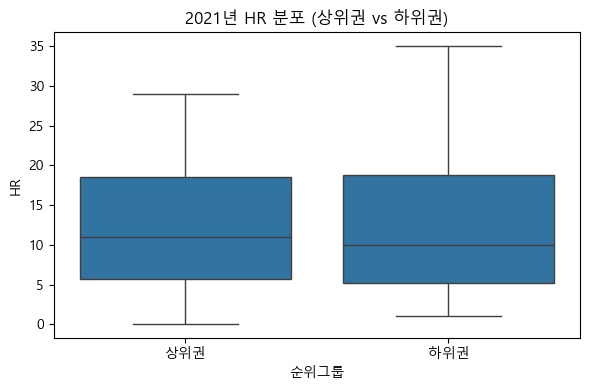


2022년 HR 독립표본 t-검정
t-통계량 = -0.08, p-value = 0.9330
=> 상/하위권 팀 간 평균은 통계적으로 유사함


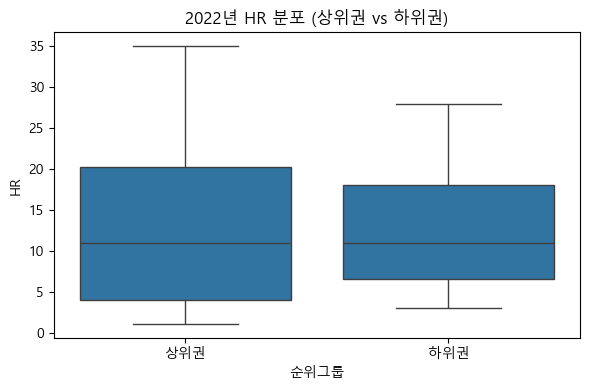


2023년 HR 독립표본 t-검정
t-통계량 = -0.04, p-value = 0.9648
=> 상/하위권 팀 간 평균은 통계적으로 유사함


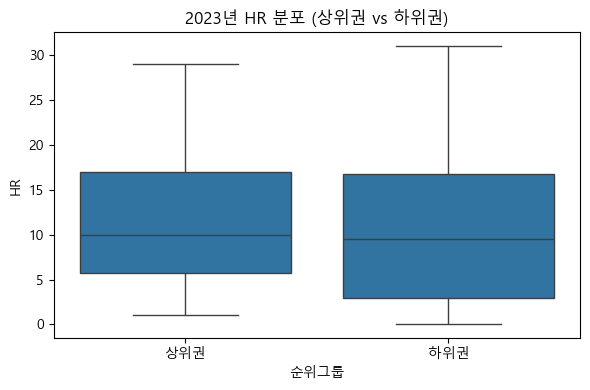


2024년 HR 독립표본 t-검정
t-통계량 = 0.25, p-value = 0.8025
=> 상/하위권 팀 간 평균은 통계적으로 유사함


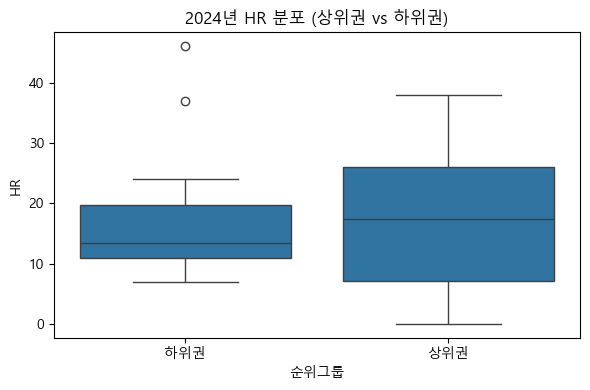

In [85]:
ttest_and_boxplot('HR')

HR 또한 그룹 사이의 차이 X

##### 3.7 상/하위권 팀의 BB 차이 검정
H0: 상하위권의 HR 평균은 동일하다.  
H1: 상하위권의 HR 평균은 동일하지 않다.


 [정규성 시각화] 변수: BB


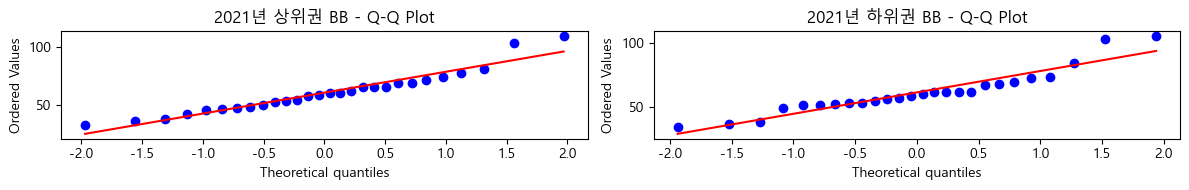

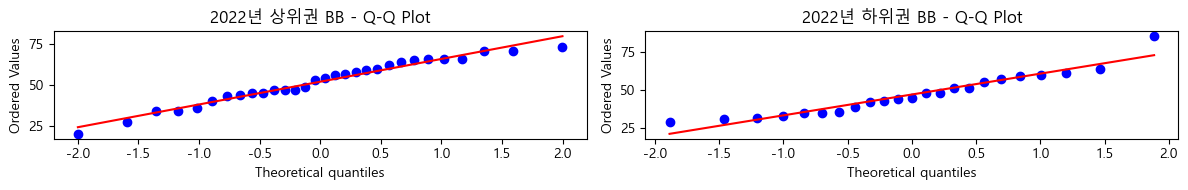

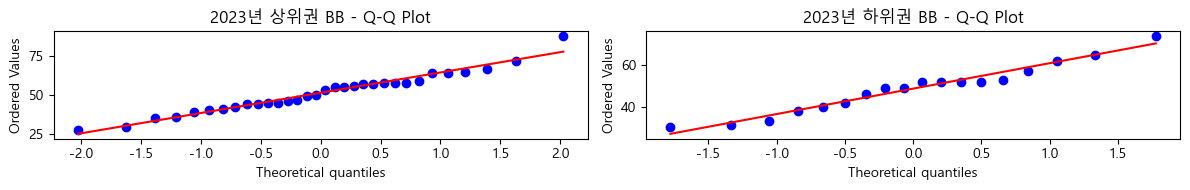

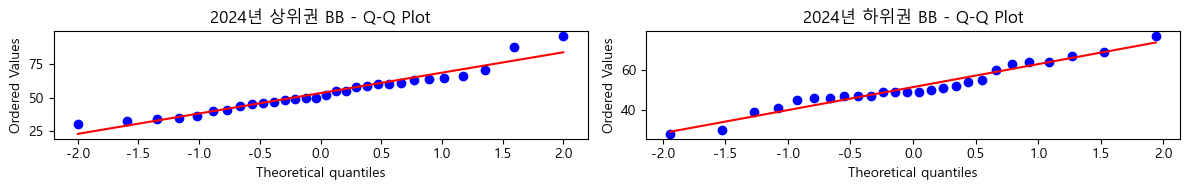

In [86]:
plot_qq('BB')

정규성 만족


 [독립표본 t-검정] 변수: BB

2021년 BB 독립표본 t-검정
t-통계량 = -0.16, p-value = 0.8747
=> 상/하위권 팀 간 평균은 통계적으로 유사함


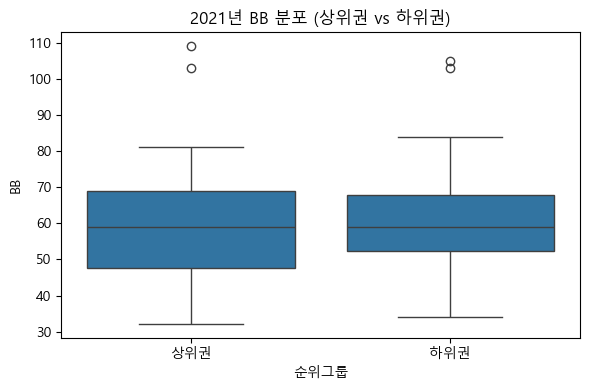


2022년 BB 독립표본 t-검정
t-통계량 = 1.30, p-value = 0.1989
=> 상/하위권 팀 간 평균은 통계적으로 유사함


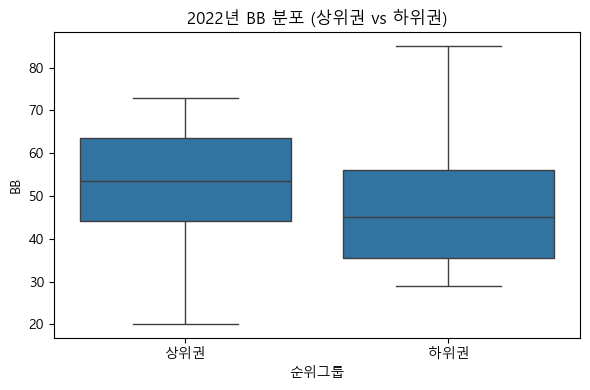


2023년 BB 독립표본 t-검정
t-통계량 = 0.75, p-value = 0.4597
=> 상/하위권 팀 간 평균은 통계적으로 유사함


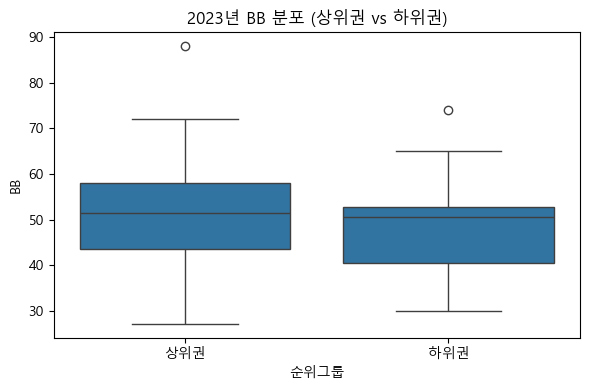


2024년 BB 독립표본 t-검정
t-통계량 = 0.53, p-value = 0.6007
=> 상/하위권 팀 간 평균은 통계적으로 유사함


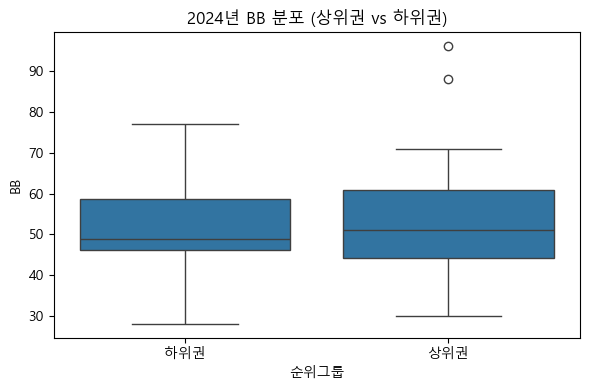

In [87]:
ttest_and_boxplot('BB')

그룹 간의 명확한 볼넷 개수 차이 X

##### 3.8 상/하위권 팀의 SO 차이 검정
H0: 상하위권의 HR 평균은 동일하다.  
H1: 상하위권의 HR 평균은 동일하지 않다.


 [정규성 시각화] 변수: SO


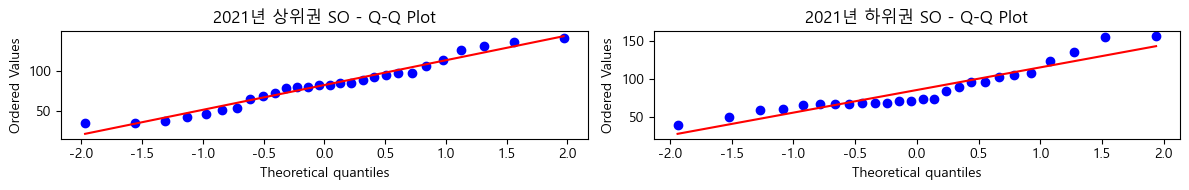

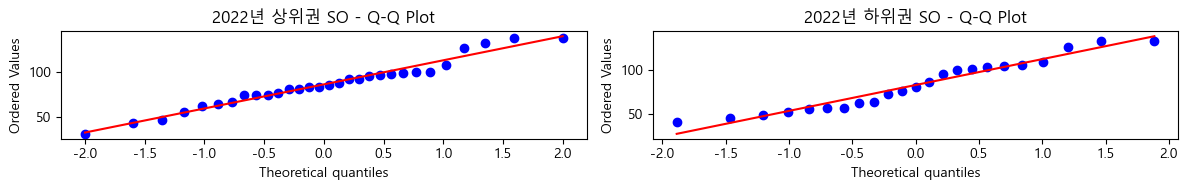

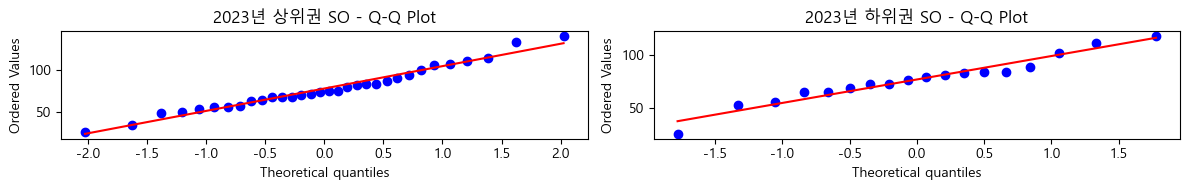

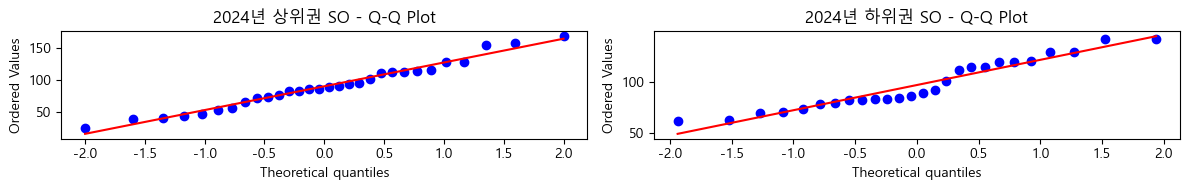

In [88]:
plot_qq('SO')


 [독립표본 t-검정] 변수: SO

2021년 SO 독립표본 t-검정
t-통계량 = -0.33, p-value = 0.7407
=> 상/하위권 팀 간 평균은 통계적으로 유사함


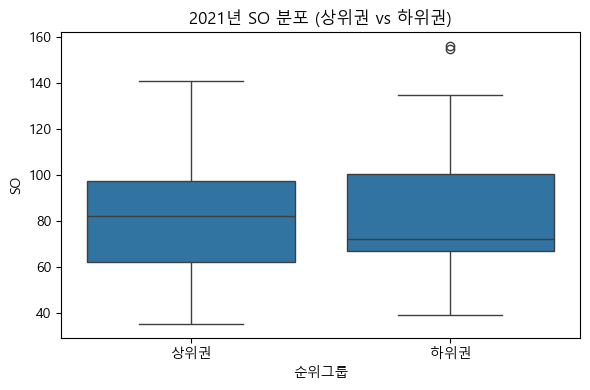


2022년 SO 독립표본 t-검정
t-통계량 = 0.43, p-value = 0.6686
=> 상/하위권 팀 간 평균은 통계적으로 유사함


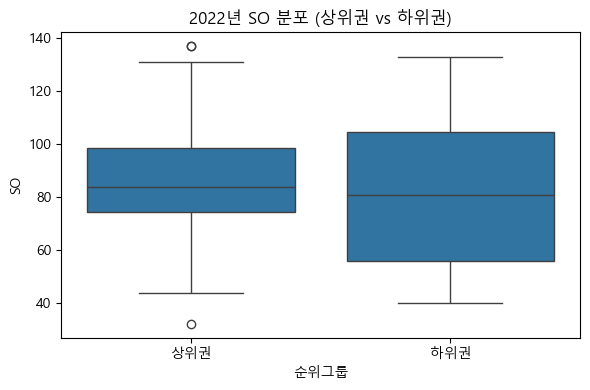


2023년 SO 독립표본 t-검정
t-통계량 = 0.05, p-value = 0.9570
=> 상/하위권 팀 간 평균은 통계적으로 유사함


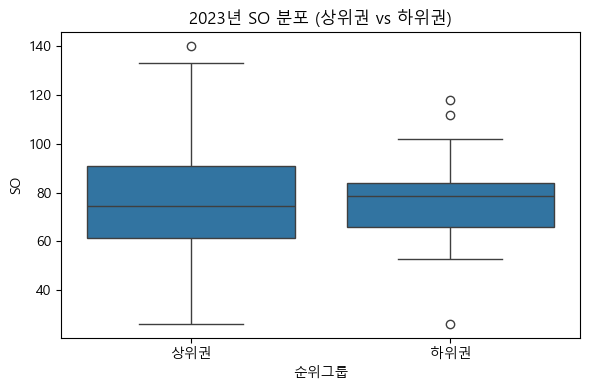


2024년 SO 독립표본 t-검정
t-통계량 = -0.86, p-value = 0.3950
=> 상/하위권 팀 간 평균은 통계적으로 유사함


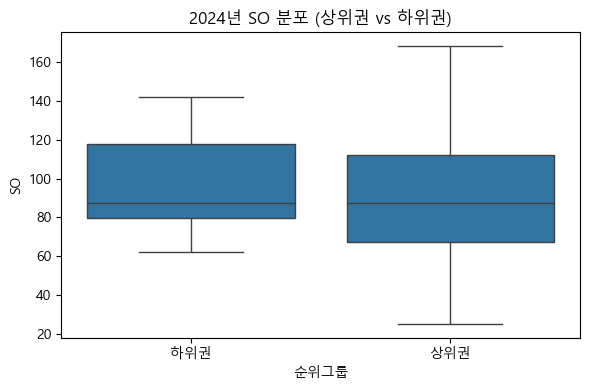

In [89]:
ttest_and_boxplot('SO')

삼진 비율 또한 유사함.

** 최종적으로 보았을 때 단일지표로는 개별 팀의 성적을 비교하기 어려우나  
** 여러 지표를 종합적으로 고려하면 상위권/하위권 팀의 성적 차이를 명확히 확인할 수 있을 것 같음.

#### 포지션별 타격지표 비교

In [92]:
def plot_qq_by_position(stat_col):
    print(f"\n [정규성 시각화] 변수: {stat_col}")
    sub_df = df[df[stat_col].notna()].copy()

    # 포지션 그룹: '내야수' / '외야수'
 
    # 각 포지션 그룹별 데이터 추출
    infield = sub_df[sub_df['포지션'] == '내야수'][stat_col]
    outfield = sub_df[sub_df['포지션'] == '외야수'][stat_col]

    # 샘플 수가 너무 적으면 Q-Q Plot 생략
    if len(infield) < 3 or len(outfield) < 3:
        print("Q-Q plot 생략 (데이터 부족)")
        return

    # 정규성 시각화를 위한 Q-Q Plot 생성
    plt.figure(figsize=(12, 2))

    plt.subplot(1, 2, 1)
    probplot(infield, dist="norm", plot=plt)
    plt.title(f"내야수 {stat_col} - Q-Q Plot")

    plt.subplot(1, 2, 2)
    probplot(outfield, dist="norm", plot=plt)
    plt.title(f"외야수 {stat_col} - Q-Q Plot")

    plt.tight_layout()
    plt.show()

In [94]:
def ttest_and_boxplot_by_position(stat_col):
    print(f"\n[독립표본 t-검정] 변수: {stat_col}")

    # 결측값이 있는 행 제거 후 복사
    sub_df = df[df[stat_col].notna()].copy()

    # 내야수와 외야수 그룹으로 구분하여 각각의 stat_col 값 추출
    infield = sub_df[sub_df['포지션'] == '내야수'][stat_col]
    outfield = sub_df[sub_df['포지션'] == '외야수'][stat_col]

    # 각 그룹의 샘플 수가 너무 적을 경우 분석 생략
    if len(infield) < 2 or len(outfield) < 2:
        print("검정 생략 (데이터 부족)")
        return

    # 독립표본 t-검정
    t_stat, p = ttest_ind(infield, outfield, equal_var=False)

    # 결과 출력
    print(f"t-통계량 = {t_stat:.2f}, p-value = {p:.4f}")
    if p < 0.05:
        print("=> 내야수와 외야수 간 평균에 유의미한 차이 있음")
    else:
        print("=> 내야수와 외야수 간 평균은 통계적으로 유사함")

    # 박스플롯 시각화
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='포지션', y=stat_col, data=sub_df)
    plt.title(f"{stat_col} 분포 (내야수 vs 외야수)")
    plt.tight_layout()
    plt.show()

##### 3.9